# SAAS x Grocery Outlet Final Pipeline

These are just import statements; run the below code cell to proceed.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pprint, pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image
import boto3
import random

import deliverable_helper8
from deliverable_helper8 import *

In [16]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import schedules

import os
from PIL import Image
from tqdm import tqdm

# Brand Model

The pipeline supports **2** ways of acquiring images to predict on. First, the pipeline supports accessing images inside an s3 bucket of your choosing. Second, the pipeline supports accessing downloaded images.

In [2]:
model2, optimizer2 = initialize_model("brand")
load_path2 = 'final_brand_model.pt'
brand_model = load_checkpoint(model2, optimizer2, load_path2)[0]

cuda:0


For predictions to be made quickly, ensure you are utilizing a GPU. If your GPU is configured, the output of the above cell will be **"cuda"**.

In [3]:
with open('final_num_to_brand.pkl', 'rb') as f:
    brand_dict = pickle.load(f)

You must run the below cell to prepare the s3 bucket. For the demo, this function `preps3` connects to the s3 bucket containing our training data. Edit the `preps3` function accordingly to access other s3 bucket instances.

In [4]:
bucket, file_names = preps3()

we have 341713 images!


## [demo] Random Image from s3 Bucket

While this image is randomly selected from the s3 bucket, passing in a specific file name into the `key` attribute below allows for the specific images to be chosen.

the image has shape: (1500, 1500, 3)


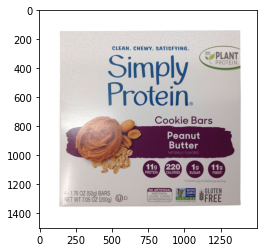

In [5]:
b = read_image_from_s3(bucket, key=file_names[99912])
print("the image has shape:", b.shape)
plt.imshow(b);
plt.show();

In [7]:
predict_brand(b, brand_model, brand_dict)

'simplyprotein'

## [demo] Downloaded Image

In [37]:
file_path = "tropicana.jpeg"

predicted: tropicana


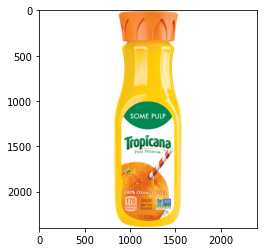

In [38]:
milk = np.array(Image.open(file_path))
plt.imshow(milk);
print("predicted: " + predict_brand(milk, brand_model, brand_dict))

# Long Description Model

Load in the model and the tokenizer, which have been saved as `.pt` and `.pkl` files.

In [ ]:
data_root = "dc-grocery-outlet-models/image_splits_v2"
df_path = "long_description_features.pkl"
splits_path = "long_des_splits"
tokenizer_path = os.path.join(splits_path, "tokenizer.pkl")
tokenizer = read_make_image_splits(tokenizer_path)

# loading model from checkpoint
from tensorflow.keras.models import load_model
caption_model = load_model('cnn_caption_model.h5')

predicted startseq bed head sh urban re energy endseq
actual tigi bed head sh urban re energy        


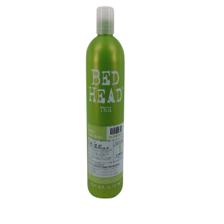

In [129]:
# fetch random image from s3 bucket, description, and test model
print("predicted", generate_desc(caption_model, tokenizer, image, 10))
print("actual", description)
display(Image.fromarray((image*255).astype(np.uint8)))

The same functionality to read from s3 bucket or from a downloaded image exists for the long description model. Since the long description model doesn't predict brands, the brand can be pre-prended to the description if needed.